<a href="https://colab.research.google.com/github/JyotikaUppar/CodSoft/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

name: jyotika Uppar


batch B52


Domain:Data science

In [1]:
# Data manipulation and analysis
import pandas as pd            # For working with tabular data (DataFrames)
import numpy as np             # For numerical operations and arrays

# Data visualization
import matplotlib.pyplot as plt  # For creating static plots
import seaborn as sns            # For statistical and advanced visualizations

# Machine learning utilities
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing sets

# Regression models
from sklearn.linear_model import LinearRegression, Ridge  # Linear and Ridge regression models
from sklearn.tree import DecisionTreeRegressor            # Decision tree regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ensemble models

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score  # For measuring model performance

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder           # For encoding categorical variables
from sklearn.feature_extraction.text import CountVectorizer  # For converting text into numerical features (Bag of Words)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [3]:
import io
movies_df = pd.read_csv((io.BytesIO(uploaded['movies.csv'])),encoding = 'unicode_escape')

Load data set

In [4]:
# The data has already been loaded in a previous cell (oyfqe5qhcFHn).
# The variable containing the DataFrame is movies_df.

# Quick preview of the loaded data
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [56]:
# Fill missing Ratings with median
movies_df['Rating'] = movies_df['Rating'].fillna(movies_df['Rating'].median())

# Replace missing Genre, Director, or Actors with 'Unknown'
movies_df[['Genre','Director','Actor 1', 'Actor 2', 'Actor 3']] = movies_df[['Genre','Director','Actor 1', 'Actor 2', 'Actor 3']].fillna('Unknown')

# Convert 'Year' to numeric, removing parentheses and handling errors
movies_df['Year'] = movies_df['Year'].astype(str).str.replace(r'[()]', '', regex=True)
movies_df['Year'] = pd.to_numeric(movies_df['Year'], errors='coerce')
# Impute missing 'Year' values with the median after numeric conversion
movies_df['Year'] = movies_df['Year'].fillna(movies_df['Year'].median())


# Convert 'Duration' to numeric, removing ' min' and handling errors
movies_df['Duration'] = movies_df['Duration'].astype(str).str.replace(' min', '', regex=False).str.replace('Unknown', '', regex=False)
movies_df['Duration'] = pd.to_numeric(movies_df['Duration'], errors='coerce')
# Impute missing 'Duration' values with the median after numeric conversion
movies_df['Duration'] = movies_df['Duration'].fillna(movies_df['Duration'].median())


# Convert 'Votes' to numeric, removing commas and handling errors
movies_df['Votes'] = movies_df['Votes'].astype(str).str.replace(',', '', regex=False).str.replace('Unknown', '', regex=False)
movies_df['Votes'] = pd.to_numeric(movies_df['Votes'], errors='coerce')
# Impute missing 'Votes' values with the median after numeric conversion
movies_df['Votes'] = movies_df['Votes'].fillna(movies_df['Votes'].median())


#  Remove duplicates
df = movies_df.drop_duplicates().copy() # Use .copy() to avoid SettingWithCopyWarning

# Check for missing values in the final df
print(df.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [6]:
# Handle missing values in 'Year' before conversion
movies_df['Year'] = movies_df['Year'].str.replace(r'[()]', '', regex=True)

# Convert to numeric, coercing errors to NaN
movies_df['Year'] = pd.to_numeric(movies_df['Year'], errors='coerce')

# Impute missing 'Year' values with the median
median_year = movies_df['Year'].median()
movies_df['Year'] = movies_df['Year'].fillna(median_year)

# Now the 'Year' column is numeric (float) with no missing values

In [7]:
movies_df['Duration'] = pd.to_numeric(movies_df['Duration'].str.replace(' min', ''), errors='coerce')


In [8]:
# Ensure 'Genre' is string type and handle potential NaN before splitting
movies_df['Genre'] = movies_df['Genre'].astype(str)

# Split genres by comma and strip whitespace
movies_df['Genre'] = movies_df['Genre'].str.split(',').apply(lambda x: [item.strip() for item in x if item.strip()])

# Explode the list of genres into separate rows
movies_df = movies_df.explode('Genre')

# Replace empty strings that might result from splitting with NaN
movies_df['Genre'] = movies_df['Genre'].replace('', np.nan)


# Fill missing Genre with mode after exploding, with a fallback
genre_mode = movies_df['Genre'].mode()
if not genre_mode.empty:
    movies_df['Genre'] = movies_df['Genre'].fillna(genre_mode[0])
else:
    movies_df['Genre'] = movies_df['Genre'].fillna('Unknown') # Fallback if mode is empty

In [9]:
# Convert 'Votes' to numeric, removing commas and handling errors
movies_df['Votes'] = movies_df['Votes'].astype(str).str.replace(',', '', regex=False)
movies_df['Votes'] = pd.to_numeric(movies_df['Votes'], errors='coerce')

# Impute missing 'Votes' values with the median
median_votes = movies_df['Votes'].median()
movies_df['Votes'] = movies_df['Votes'].fillna(median_votes)

# Now the 'Votes' column is numeric (float) with no missing values

In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24950 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      24950 non-null  object 
 1   Year      24950 non-null  float64
 2   Duration  14168 non-null  float64
 3   Genre     24950 non-null  object 
 4   Rating    24950 non-null  float64
 5   Votes     24950 non-null  float64
 6   Director  24950 non-null  object 
 7   Actor 1   24950 non-null  object 
 8   Actor 2   24950 non-null  object 
 9   Actor 3   24950 non-null  object 
dtypes: float64(4), object(6)
memory usage: 2.1+ MB


Exploratory Data Analysis (EDA)

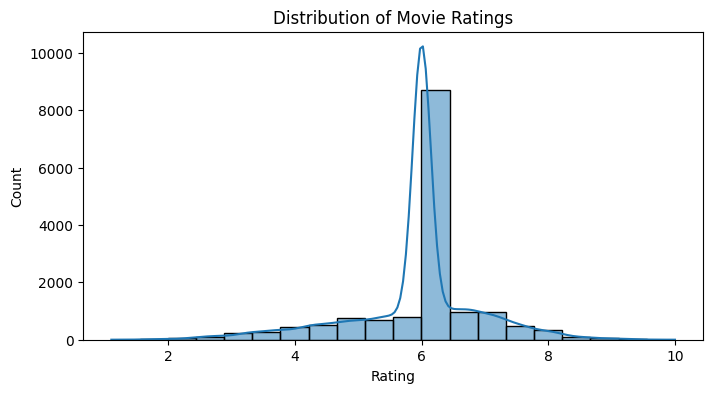

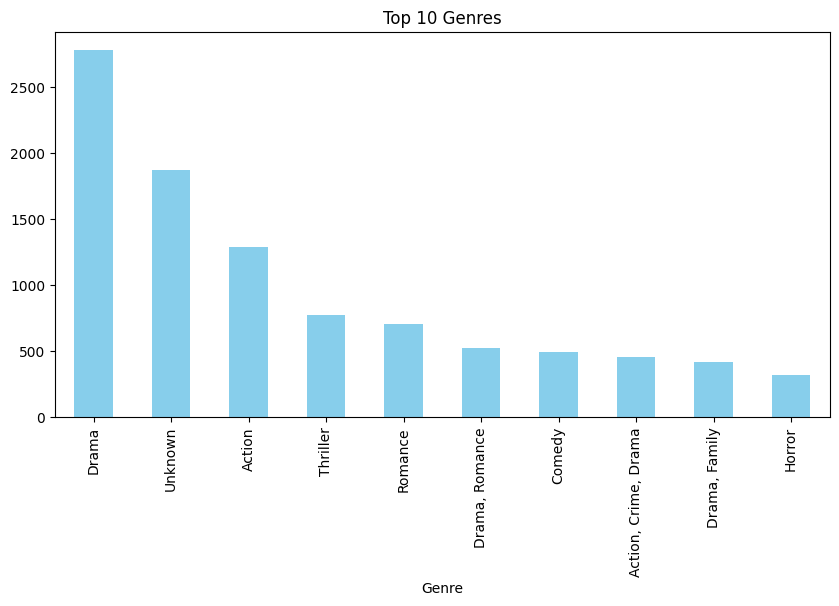

In [11]:
# Distribution of Ratings
plt.figure(figsize=(8,4))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.show()

# Top 10 genres
top_genres = df['Genre'].value_counts().head(10)
top_genres.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Top 10 Genres")
plt.show()


In [12]:
import plotly.express as px

year = px.histogram(movies_df,x = 'Year', histnorm = 'probability density' , nbins = 30)

year.show()

In [13]:
#group data by year and calculate the average rating
avg_rate_year = movies_df.groupby(['Year','Genre'])['Rating'].mean().reset_index()
#get top 10 genere
top_10_genres = movies_df['Genre'].value_counts().head(10).index

In [14]:
#filtering data to include only  the top 3 genere
avg_rate_year = avg_rate_year[avg_rate_year['Genre'].isin(top_10_genres)]

In [15]:
#line plot by ploty Express
fig = px.line(avg_rate_year, x='Year', y='Rating', color='Genre', title='Average Rating by Year and Genre')
fig.show()

Feature Engineering

In [16]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [17]:
#split multiple genres
#create binary columns for each genre
genre_list = list(set([g for sublist in df['Genre'].str.split(',') for g in sublist]))
for genre in genre_list:
    df[genre] = df['Genre'].apply(lambda x: 1 if genre in x else 0)


In [18]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', ' Sci-Fi', 'Adventure', 'Drama',
       'Musical', ' Adventure', 'Action', 'Sport', 'Sci-Fi', 'Biography',
       ' War', 'Music', 'Horror', ' Comedy', ' Fantasy', ' Family', 'Romance',
       ' Action', ' Mystery', ' Music', 'Animation', ' Drama', ' Musical',
       'Documentary', ' Horror', 'Crime', ' Western', ' Short', 'Mystery',
       'War', 'Unknown', ' Romance', 'Family', ' Thriller', 'Comedy',
       ' Biography', ' News', 'Thriller', ' Sport', ' Crime', ' Reality-TV',
       'History', 'Reality-TV', 'Fantasy', ' History'],
      dtype='object')


In [19]:
#split multiple genres
#create binary columns for each genre

# Ensure 'Genre' is string type and handle potential NaN before splitting
df['Genre'] = df['Genre'].astype(str).fillna('')

# Split genres by comma and strip whitespace
df['Genre'] = df['Genre'].str.split(',').apply(lambda x: [item.strip() for item in x if item.strip()])

# Get the list of unique genres
genre_list = sorted(list(set([g for sublist in df['Genre'] for g in sublist])))

# Create binary columns for each genre using get_dummies
# We use df.apply(pd.Series) to handle the list in each cell
genre_dummies = df['Genre'].apply(pd.Series).stack().str.get_dummies().groupby(level=0).sum()

# Add the new genre dummy columns to the dataframe
df = pd.concat([df, genre_dummies], axis=1)

# Drop the original 'Genre' column with lists
df = df.drop(columns=['Genre'])

In [20]:
#Director average rating
director_ratings = df.groupby('Director')['Rating'].mean()
df['Director_Rating'] = df['Director'].map(director_ratings)

# Check for missing values after adding the new column
print(df[['Director', 'Director_Rating']].head())
print(df['Director_Rating'].isnull().sum())

             Director  Director_Rating
0       J.S. Randhawa         5.850000
1       Gaurav Bakshi         7.000000
2  Soumyajit Majumdar         6.000000
3          Ovais Khan         4.400000
4        Amol Palekar         6.285714
0


In [21]:
#Director average rating
director_ratings = df.groupby('Director')['Rating'].mean()
df['Director_Rating'] = df['Director'].map(director_ratings)

In [22]:
#top actors features
from collections import Counter

# Create a copy to avoid SettingWithCopyWarning
df_copy = df.copy()

# Combine actor columns into a single list for each movie
df_copy['Actors_combined'] = df_copy[['Actor 1', 'Actor 2', 'Actor 3']].apply(lambda x: ','.join(x.dropna()), axis=1)

actor_counts = Counter([actor.strip() for sublist in df_copy['Actors_combined'].str.split(',') for actor in sublist])
top_actors = [actor for actor,count in actor_counts.most_common(20)]

for actor in top_actors:
    df_copy[actor+'_actor'] = df_copy['Actors_combined'].apply(lambda x: 1 if actor in x else 0)

# Drop the combined actors column after creating features
df = df_copy.drop('Actors_combined', axis=1)

In [24]:
#prepare Training and Test Sets
# Drop original string columns and the target variable
X = df.drop(columns=['Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating'], errors='ignore')
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [57]:
# ============================
# Preprocessing Pipeline
# ============================

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Work on a copy
# 'Year', 'Duration', and 'Votes' are now handled in cell LldM4ecYaVme
data = df.copy()

# --- Encode Director (Mean Encoding) ---
# Ensure Director column has no missing values before grouping
data['Director'] = data['Director'].fillna('Unknown')
director_avg = data.groupby("Director")["Rating"].mean()
data["Director_avg_rating"] = data["Director"].map(director_avg)
# Fill any potential NaNs resulting from new directors with the overall median rating
data["Director_avg_rating"] = data["Director_avg_rating"].fillna(data["Rating"].median())


# --- Encode Top Actors (One-Hot) ---
# Extract first 3 actors from original actor columns, handling NaNs
data["Actors_combined"] = data[['Actor 1', 'Actor 2', 'Actor 3']].fillna('Unknown').apply(lambda x: ','.join(x), axis=1)


# Flatten list to get frequency
from collections import Counter
actor_list = data["Actors_combined"].str.split(",").apply(lambda x: [a.strip() for a in x])
actor_freq = Counter([actor for sublist in actor_list for actor in sublist if actor != 'Unknown']) # Exclude 'Unknown'

# Keep top 20 actors
top_actors = [a for a, c in actor_freq.most_common(20)]

for actor in top_actors:
    data[actor+"_actor"] = data["Actors_combined"].apply(lambda x: 1 if actor in x else 0)

# Drop the combined actors column after creating features
data = data.drop('Actors_combined', axis=1)

# --- Encode Genre (One-Hot) ---
# Assuming Genre is already handled and exploded in previous cells resulting in dummy columns
# If not, you would need to re-apply the genre exploding and get_dummies here.
# Based on the column list from cell f7b5b072, dummy genre columns already exist in df.
# We need to make sure they are included in X.


# --- Features & Target ---
# Drop original string actor and director columns, and other non-numeric columns not intended as features
# Include all generated dummy features and the new Director_avg_rating
columns_to_drop = ["Rating", "Name", "Director", 'Actor 1', 'Actor 2', 'Actor 3']
# Drop genre list column if it still exists and is not the dummy columns
if 'Genre' in data.columns and data['Genre'].dtype == 'object': # Check if the original list-based Genre column exists
     columns_to_drop.append('Genre')


X = data.drop(columns=columns_to_drop, errors='ignore') # remove non-numeric & target
y = data["Rating"]


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Preprocessing Done!")
print("Final Feature Columns:", X.columns.tolist()[:15], "...") # Print a few more columns to verify
print("\nMissing values in X_train after preprocessing and split:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])

 Preprocessing Done!
Final Feature Columns: ['Year', 'Duration', 'Votes', 'Director_avg_rating', 'Dharmendra_actor', 'Mithun Chakraborty_actor', 'Ashok Kumar_actor', 'Amitabh Bachchan_actor', 'Jeetendra_actor', 'Akshay Kumar_actor', 'Sanjay Dutt_actor', 'Rajesh Khanna_actor', 'Rekha_actor', 'Jackie Shroff_actor', 'Shashi Kapoor_actor'] ...

Missing values in X_train after preprocessing and split:
Series([], dtype: int64)


In [31]:
print(X_train.dtypes)


Year                   float64
Duration               float64
Votes                  float64
 Sci-Fi                  int64
Adventure                int64
                        ...   
Helen_actor              int64
Jeevan_actor             int64
Pran_actor               int64
Director_avg_rating    float64
Govinda_actor            int64
Length: 95, dtype: object


In [32]:
print(X_train.head())


       Year  Duration  Votes   Sci-Fi  Adventure  Drama  Musical   Adventure  \
10868   NaN       NaN   35.0        0          0      0        0           0   
9800    NaN       NaN   35.0        0          0      0        0           0   
12164   NaN       NaN   35.0        0          0      1        0           0   
9425    NaN       NaN   11.0        0          0      0        0           0   
15035   NaN       NaN   35.0        0          0      1        0           0   

       Action  Sport  ...  Sanjay Dutt_actor  Akshay Kumar_actor  \
10868       1      0  ...                  0                   0   
9800        0      0  ...                  0                   0   
12164       0      0  ...                  0                   0   
9425        0      0  ...                  0                   0   
15035       0      0  ...                  0                   0   

       Jackie Shroff_actor  Raj Babbar_actor  Sanjeev Kumar_actor  \
10868                    0               

In [33]:
print(X_train.isnull().sum().sort_values(ascending=False).head(10))


Year          12402
Duration      12402
Votes             0
 Sci-Fi           0
Adventure         0
Drama             0
Musical           0
 Adventure        0
Action            0
Sport             0
dtype: int64


In [39]:
import os
print(os.getcwd())


/content


In [42]:
pip install chardet
import chardet

with open("/content/movies.csv", "rb") as f:
    print(chardet.detect(f.read(100000)))


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


Missing values in X_train right before training:
Series([], dtype: int64)

Missing values in X_test right before training:
Series([], dtype: int64)


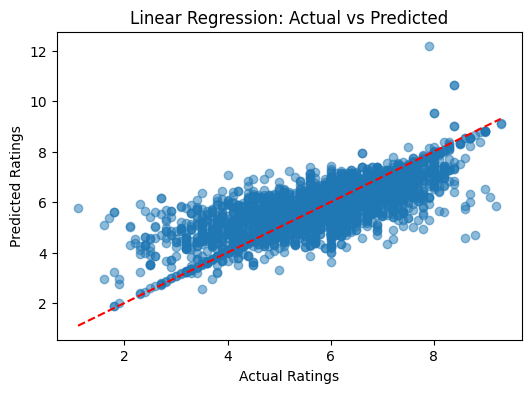

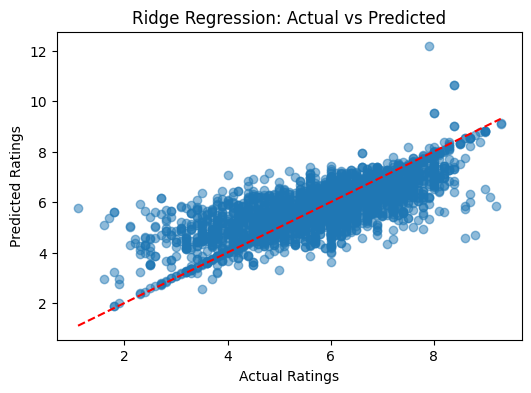

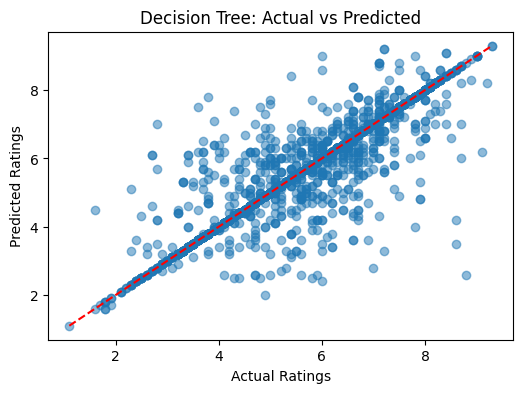

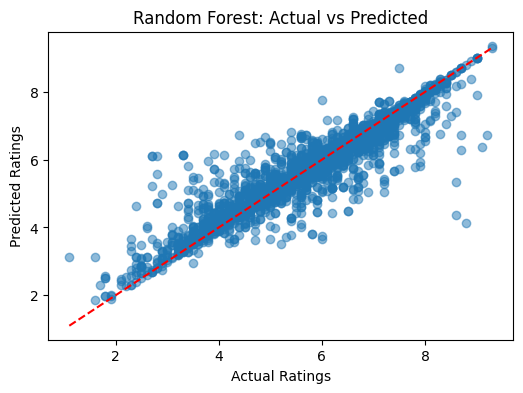

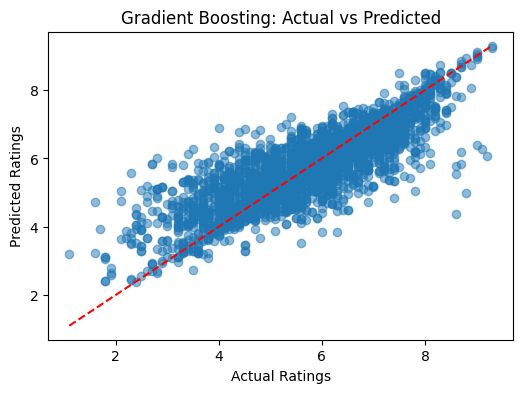

,RMSE,R2
Linear Regression,0.712929,0.574449
Ridge Regression,0.712922,0.574458
Decision Tree,0.482411,0.805154
Random Forest,0.386138,0.875163
Gradient Boosting,0.606444,0.692079


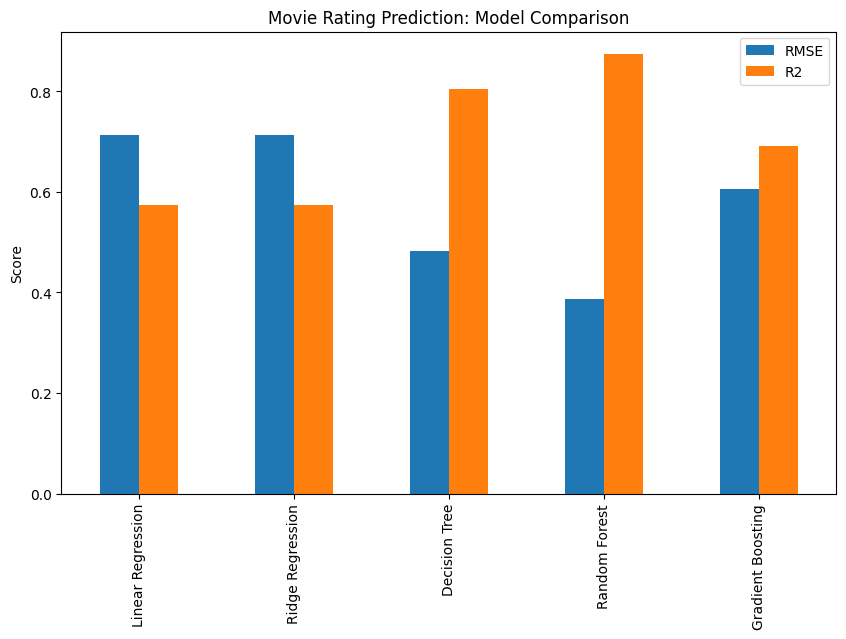

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Removed SimpleImputer import and imputation steps as they are handled in kQkHKZIkqqHv

# Ensure using the X_train, X_test, y_train, y_test from cell kQkHKZIkqqHv
# Check for missing values in X_train and X_test right before training
print("Missing values in X_train right before training:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])
print("\nMissing values in X_test right before training:")
print(X_test.isnull().sum()[X_test.isnull().sum() > 0])


# ============================
# Multi Model Training and Evaluation
# ============================

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    # Use the preprocessed data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "R2": r2}

    # Predicted vs Actual plot
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Use y_test min/max for plot range
    plt.xlabel("Actual Ratings")
    plt.ylabel("Predicted Ratings")
    plt.title(f"{name}: Actual vs Predicted")
    plt.show()

# Results comparison
results_df = pd.DataFrame(results).T
display(results_df)

# Bar chart for comparison
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Movie Rating Prediction: Model Comparison")
plt.ylabel("Score")
plt.show()

In [30]:
# Execute the model training and evaluation cell
%recall EigKTwEWexjJ

Couldn't evaluate or find in history: EigKTwEWexjJ


In [46]:
print("Missing values in X_train before training:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])

Missing values in X_train before training:
Year        12402
Duration    12402
dtype: int64


In [47]:
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])

Year        12402
Duration    12402
dtype: int64


tree based model


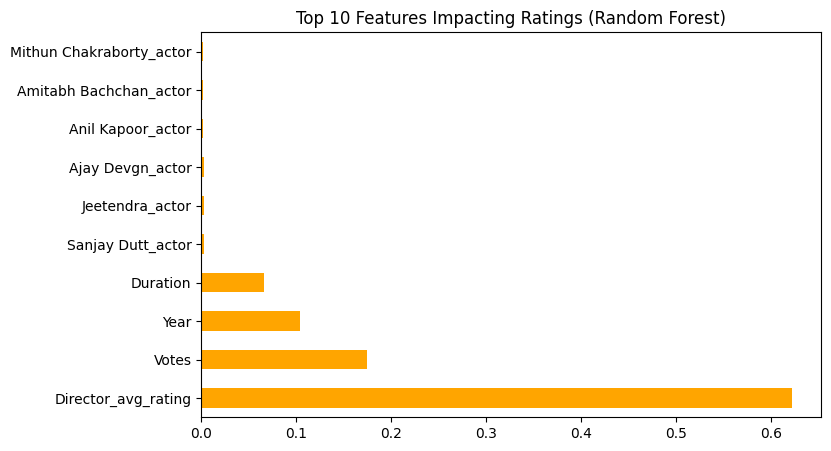

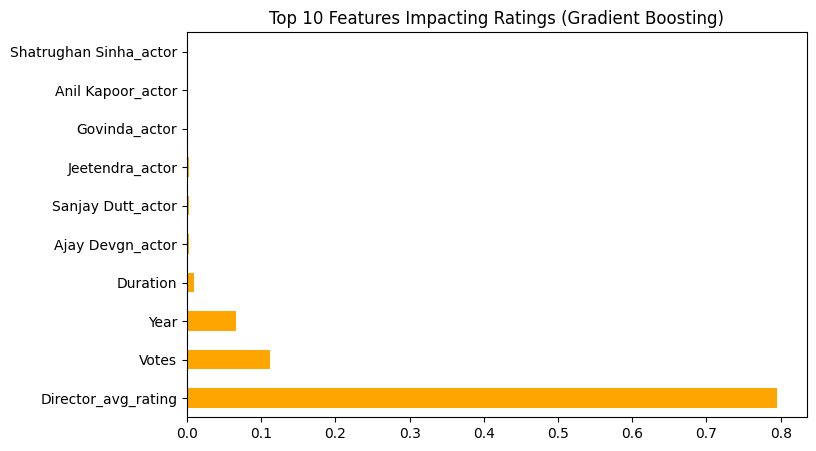

In [61]:
for name in ['Random Forest', 'Gradient Boosting']:
    model_pipeline = models[name]  # Could be Pipeline or direct estimator

    # If it's a pipeline, extract the actual model
    if hasattr(model_pipeline, "named_steps"):
        model = model_pipeline.named_steps['model']
    else:
        model = model_pipeline  # already a direct model

    # Plot feature importances if available
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False).head(10)

        plt.figure(figsize=(8,5))
        feat_imp.plot(kind='barh', color='orange')
        plt.title(f"Top 10 Features Impacting Ratings ({name})")
        plt.show()
    else:
        print(f"Model {name} does not support feature importances.")


In [29]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
X.head(10)

,Year,Duration,Votes,Director_avg_rating,Dharmendra_actor,Mithun Chakraborty_actor,Ashok Kumar_actor,Amitabh Bachchan_actor,Jeetendra_actor,Akshay Kumar_actor,...,Shashi Kapoor_actor,Shatrughan Sinha_actor,Ajay Devgn_actor,Govinda_actor,Rishi Kapoor_actor,Sanjeev Kumar_actor,Vinod Khanna_actor,Anil Kapoor_actor,Dev Anand_actor,Hema Malini_actor
0,1991.0,135.0,89.0,5.850000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019.0,109.0,8.0,7.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021.0,90.0,89.0,6.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021.0,90.0,89.0,6.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019.0,110.0,35.0,4.400000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019.0,110.0,35.0,4.400000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010.0,105.0,89.0,6.333333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1997.0,147.0,827.0,5.353846,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1997.0,147.0,827.0,5.353846,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1997.0,147.0,827.0,5.353846,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y.head(10)

,Rating
0,6.0
1,7.0
2,6.0
2,6.0
3,4.4
3,4.4
4,6.0
5,4.7
5,4.7
5,4.7


In [64]:
data = {'Year': [2019], 'Votes': [36], 'Duration': [111], 'Genre_mean_rating': [5.8], 'Director_encoded': [4.5], 'Actor1_encoded': [5.3], 'Actor2_encoded': [4.5], 'Actor3_encoded': [4.5]}
trail = pd.DataFrame(data)


In [65]:
def prepare_movie_features(new_movie, X_train, director_ratings):
    """
    Convert a new movie's data into a DataFrame with features matching X_train's columns.
    Ensures the output DataFrame has the exact same structure as X_train.

    Args:
        new_movie (dict): Info about the new movie (Year, Duration, Votes, Genre, Director, Actors).
        X_train (DataFrame): Training feature matrix used for model fitting.
        director_ratings (Series): Mapping of director -> average rating.

    Returns:
        DataFrame: A single row with features aligned to X_train.
    """

    # Initialize with zeros for all columns
    X_new = pd.DataFrame(0, index=[0], columns=X_train.columns)

    # --- Numeric features ---
    for col in ['Year', 'Duration', 'Votes']:
        if col in new_movie and col in X_train.columns:
            X_new.loc[0, col] = new_movie[col]
        elif col in X_train.columns:
            X_new.loc[0, col] = pd.to_numeric(X_train[col], errors='coerce').median()

    # --- Director average rating ---
    if 'Director_avg_rating' in X_train.columns:
        director = new_movie.get('Director')
        if director in director_ratings:
            X_new.loc[0, 'Director_avg_rating'] = director_ratings[director]
        else:
            X_new.loc[0, 'Director_avg_rating'] = pd.to_numeric(
                X_train['Director_avg_rating'], errors='coerce'
            ).median()

    # --- Genres (match dummy columns like "Genre_Action", "Genre_Comedy") ---
    if "Genre" in new_movie:
        for col in X_train.columns:
            if col.startswith("Genre_"):
                gname = col.replace("Genre_", "")
                if gname in new_movie["Genre"]:
                    X_new.loc[0, col] = 1

    # --- Actors (match top actor dummy features like "Tom Hanks_actor") ---
    if "Actors" in new_movie:
        for actor in new_movie["Actors"]:
            col = actor.strip() + "_actor"
            if col in X_train.columns:
                X_new.loc[0, col] = 1

    return X_new


In [66]:
# Single movie
new_movie = {
    'Year': 2023,
    'Duration': 150,
    'Votes': 1200,
    'Genre': ['Action', 'Sci-Fi'],
    'Director': 'Christopher Nolan',
    'Actors': ['Leonardo DiCaprio', 'Tom Hardy']
}

# Multiple movies
new_movies = [
    {
        'Year': 2019,
        'Duration': 130,
        'Votes': 800,
        'Genre': ['Drama', 'Romance'],
        'Director': 'Greta Gerwig',
        'Actors': ['Saoirse Ronan', 'Timothée Chalamet']
    },
    {
        'Year': 2021,
        'Duration': 180,
        'Votes': 2000,
        'Genre': ['Action', 'Adventure'],
        'Director': 'Denis Villeneuve',
        'Actors': ['Timothée Chalamet', 'Zendaya']
    }
]


In [67]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

# Store results in DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                         R2      RMSE
Linear Regression  0.574449  0.712929
Ridge Regression   0.574458  0.712922
Decision Tree      0.805154  0.482411
Random Forest      0.875441  0.385707
Gradient Boosting  0.666520  0.631110


In [68]:
# Select the model with highest R² score
best_model_name = results_df["R2"].idxmax()
best_model = models[best_model_name]

print(f"✅ Best model is: {best_model_name}")


✅ Best model is: Random Forest


In [69]:
def predict_new_movie_rating(new_movie, best_model, X_train, director_ratings):
    X_new = prepare_movie_features(new_movie, X_train, director_ratings)
    rating_pred = best_model.predict(X_new)[0]
    return rating_pred

# Usage
predicted = predict_new_movie_rating(new_movie, best_model, X_train, director_ratings)
print(f"🎬 Predicted Rating: {predicted:.2f}")


🎬 Predicted Rating: 5.53
